In [1]:
import numpy as np
import matplotlib.pyplot as plt

from rocket_circularization import RocketCircularization
from LQR import LQR

[1.   0.   1.   0.75]
[0.74738616 0.00900678 1.55239968 0.75      ]
[0.7473856  0.00900634 1.55240072 0.75      ]
[0.7473856  0.00900634 1.55240072 0.75      ]
[0.7473856  0.00900634 1.55240072 0.75      ]
49.5736898408236 500


MovieWriter stderr:
dyld[2566]: Library not loaded: @rpath/libopenh264.5.dylib
  Referenced from: /Users/yizhonghu/anaconda3/envs/py3/lib/libavcodec.58.54.100.dylib
  Reason: tried: '/Users/yizhonghu/anaconda3/envs/py3/lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/envs/py3/lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/envs/py3/lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/envs/py3/lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/envs/py3/lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/envs/py3/lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/envs/py3/lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/envs/py3/lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/envs/py3/lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/envs/py3/bin/../lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/env

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '288x288', '-pix_fmt', 'rgba', '-r', '10.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'LQR-transfer-to-given-orbit.mp4']' died with <Signals.SIGABRT: 6>.

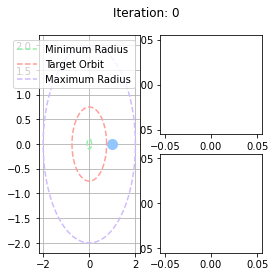

In [2]:
config_init_cond = {
    'function': 'rotated_state',
    'parameters': {'st': [1, 0, 0, 1], 'random': False}
}

config_env = {
    'max_iter': 500,
    'evaluation_steps': 0,
    'iter_steps': 10,
    'radius_range': [0.1, 2],
    'target_radius': 0.75,
    'dt': 0.01,
    'M': 1,
    'm': 0.01,
    'G': 1,
    'init_state': config_init_cond,
    'max_thrust': .2,
    'circularization_penalty': 1,
    'evaluation_penalty': 1,
    'inbounds_reward': 1,
    'thrust_penalty': 0,
    't_vec_len': 100,
    'state_output_mode': 'No Theta',
    'state_target_r': True,
    'thrust_mode': 'Continuous',
    'clip': True
}

env = RocketCircularization(**config_env)
actor = LQR(mu=1)

obs = env.reset()
done = False
total_reward = 0
iters = 0

l0 = 1
r0 = 1

while not done:
    if iters % 100 == 0:
      print(obs)
    obs, rwd, done, _ = env.step(actor.act(obs) / config_env['max_thrust'])

    total_reward += rwd
    iters += 1

print(total_reward, iters)
env.save('LQR-transfer-to-given-orbit.mp4')

In [11]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import numpy as np

In [39]:
with tf.GradientTape() as tape:
    mu = tf.Variable(10, trainable=True, dtype=tf.float32, name='mu')
    sigma = tf.Variable(.1, trainable=True, dtype=tf.float32, name='sigma')
    dist = tfd.Normal(mu, sigma)
    val = dist.sample(seed=0)
    print(val.numpy())
    log_prob = dist.log_prob(val.numpy())
    print(log_prob.numpy())
    grad = tape.gradient(log_prob, [mu, sigma])
    print(grad)
    
    # log_prob_exp = -tf.math.log(sigma) - tf.math.log(2 * np.pi) / 2 - tf.pow((val - mu) / sigma, 2) / 2
    # print(log_prob_exp.numpy())
    # grad_exp = tape.gradient(log_prob_exp, [mu, sigma])
    
    # print(grad_exp)

9.73217
-2.2029963
[<tf.Tensor: shape=(), dtype=float32, numpy=-26.78299>, <tf.Tensor: shape=(), dtype=float32, numpy=61.73291>]
